# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)#changed size from 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



In [3]:
# Print the city count to confirm sufficient count (500+)
len(cities)

601

### API Calls

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
target_url = f"{url}appid={weather_api_key}&units={units}&q="

#Empty lists to capture city information and weather
city_list=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lon=[]
maxTemp=[]
wind=[]


In [5]:
#Function to log city ID and name in text file rather than printing out. Please look at "cities_log.txt" for log.

def logCityInfo(num,name):
    with open("cities_log.txt","a") as f:
        f.write("-----City information:------\n")
        f.write("ID: "+ str(num) + "\n")
        f.write("Name:" + name + "\n")
        f.write("----------------------------\n")

In [6]:
#Function to call cities and append to lists. This allowed for testing of individual cities if wanted.
def cityInfo(name):
    response = requests.get(target_url + name).json() #url
    city_name = response['name']
    city_id = response['id']
    country.append(response['sys']['country'])
    date.append(response['dt'])
    humidity.append(response['main']['humidity'])
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    maxTemp.append(response['main']['temp_max'])
    wind.append(response['wind']['speed'])        
    city_list.append(city_name)
    cloudiness.append(response['clouds']['all'])
    logCityInfo(city_id,city_name)

In [7]:
#API Calls
for city in cities:
    try:
        cityInfo(city)
    except:
        print("--------",city,"Has no data available. --------")
    

-------- taolanaro Has no data available. --------
-------- mergui Has no data available. --------
-------- jinchengjiang Has no data available. --------
-------- barentsburg Has no data available. --------
-------- illoqqortoormiut Has no data available. --------
-------- amderma Has no data available. --------
-------- kawana waters Has no data available. --------
-------- vaitupu Has no data available. --------
-------- kemijarvi Has no data available. --------
-------- skovde Has no data available. --------
-------- nizhneyansk Has no data available. --------
-------- astipalaia Has no data available. --------
-------- sentyabrskiy Has no data available. --------
-------- belushya guba Has no data available. --------
-------- tsihombe Has no data available. --------
-------- ngukurr Has no data available. --------
-------- cookshire Has no data available. --------
-------- balimo Has no data available. --------
-------- samusu Has no data available. --------
-------- bengkalis Has 

### Convert Data to DataFrame


In [8]:
#Create DataFrame for weather items
city_weather_df = pd.DataFrame(city_list)
city_weather_df.rename(columns={0:"City"},inplace=True)
city_weather_df["Cloudiness"] = cloudiness
city_weather_df["Country"] = country
city_weather_df["Date"] = date
city_weather_df["Humidity"] = humidity
city_weather_df["Latitude"] = lat
city_weather_df["Longitude"] = lon
city_weather_df["Max Temp"] = maxTemp
city_weather_df["Wind Speed"] = wind
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Avarua,4,CK,1580319106,94,-21.21,-159.78,75.20,11.25
1,Jalu,0,LY,1580319229,38,29.03,21.55,60.17,4.00
2,Pevek,100,RU,1580319229,98,69.70,170.31,-18.18,10.20
3,Kruisfontein,87,ZA,1580319230,83,-34.00,24.73,64.35,9.44
4,Ribeira Grande,75,PT,1580319230,93,38.52,-28.70,62.60,11.41


In [9]:
#Export to csv file for use in "VacationPy.ipynb"
city_weather_df.to_csv("city_weather_data.csv")

### Plotting the Data

#### Latitude vs. Temperature Plot

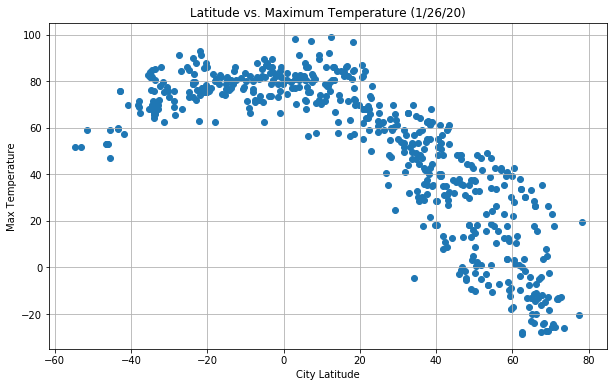

In [28]:
#Latitude Vs Temperature Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Max Temp'])
plt.title("Latitude vs. Maximum Temperature (1/26/20)")
plt.ylabel("Max Temperature")
plt.xlabel("City Latitude")
plt.grid()
plt.savefig("latvstemp.png")
plt.show()

#### Latitude vs. Humidity Plot

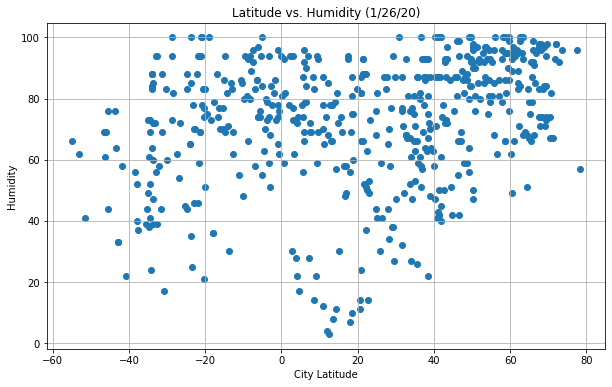

In [27]:
#Latitude Vs Humidity Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Humidity'])
plt.title("Latitude vs. Humidity (1/26/20)")
plt.ylabel("Humidity")
plt.xlabel("City Latitude")
plt.grid()
plt.savefig("latvshumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

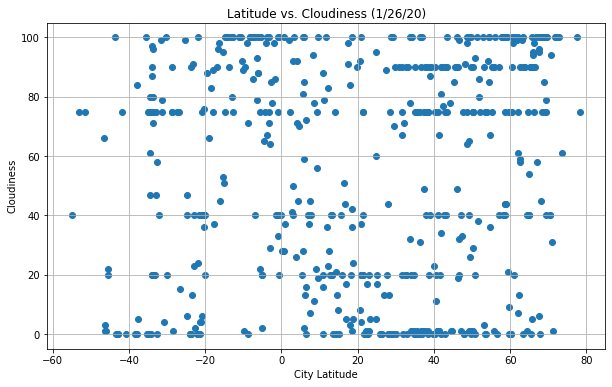

In [26]:
#Latitude Vs Cloudiness Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Cloudiness'])
plt.title("Latitude vs. Cloudiness (1/26/20)")
plt.ylabel("Cloudiness")
plt.xlabel("City Latitude")
plt.grid()
plt.savefig("latvsclouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

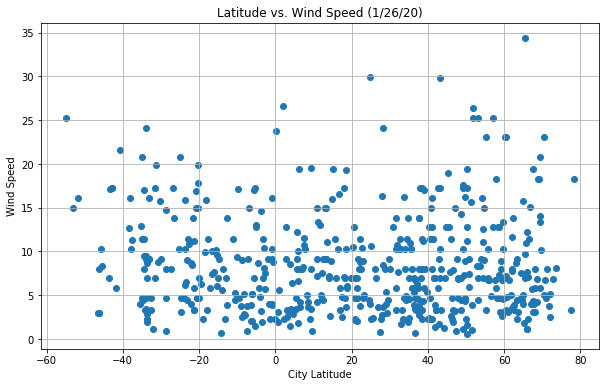

In [25]:
#Latitude vs Wind Speed Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(city_weather_df['Latitude'],city_weather_df['Wind Speed'])
plt.title("Latitude vs. Wind Speed (1/26/20)")
plt.ylabel("Wind Speed")
plt.xlabel("City Latitude")
plt.grid()
plt.savefig("latvswind.png")
plt.show()

## Linear Regression

In [14]:
#Function to create Linear Regression plots
def linRegressPlots(xval,yval):
    x_values = xval
    y_values = yval
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(10,6))
    plt.scatter(x_values,y_values,alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.mean()-5,y_values.min()+6),fontsize=16,color="black")
    print(f"The r-squared is: {round(rvalue**2,3)}")
    if xval.mean()<0:
        plt.title(f"Southern Hemisphere {xval.name} vs. {yval.name} Linear Regression")
    else:
        plt.title(f"Northern Hemisphere {xval.name} vs. {yval.name} Linear Regression")
    plt.xlabel(xval.name)
    plt.ylabel(yval.name)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = city_weather_df.loc[city_weather_df['Latitude']>=0]
south_hem = city_weather_df.loc[city_weather_df['Latitude']<0]

In [17]:
#print out of one new DataFrame to assess data
south_hem.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Avarua,4,CK,1580319106,94,-21.21,-159.78,75.20,11.25
3,Kruisfontein,87,ZA,1580319230,83,-34.00,24.73,64.35,9.44
5,Bluff,66,NZ,1580319230,69,-46.60,168.33,53.01,3.00
7,Mataura,3,NZ,1580319230,69,-46.19,168.86,53.01,3.00
8,Hermanus,47,ZA,1580319230,69,-34.42,19.23,68.00,8.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.761


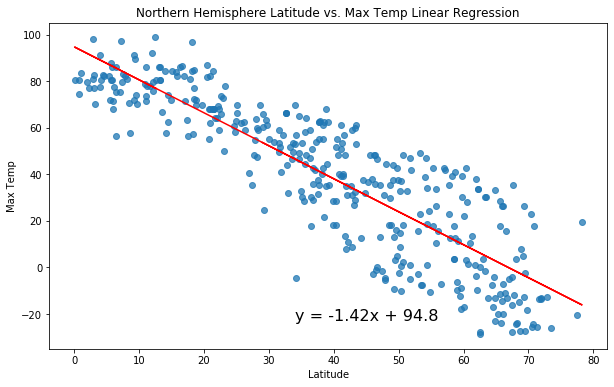

In [18]:
#Linear Regression Northern Hemisphere Max Temp vs Latitude
linRegressPlots(north_hem['Latitude'],north_hem['Max Temp'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.305


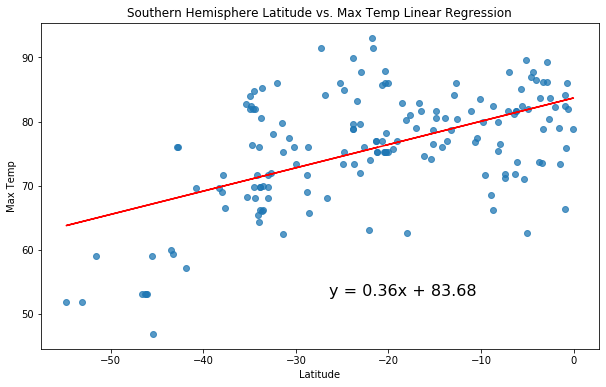

In [19]:
#Linear Regression Southern Hemisphere Max Temp vs Latitude
linRegressPlots(south_hem['Latitude'],south_hem['Max Temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.144


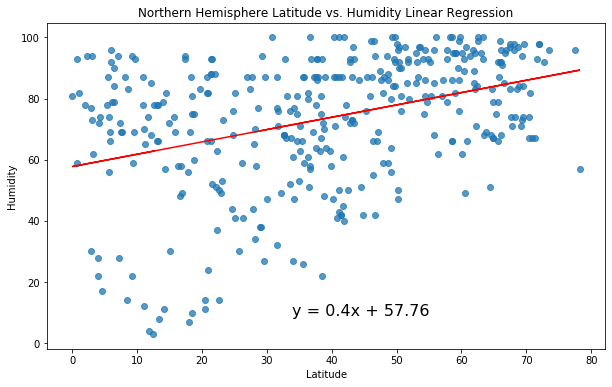

In [20]:
#Linear Regression Northern Hemisphere Humidity vs Latitude
linRegressPlots(north_hem['Latitude'],north_hem['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.139


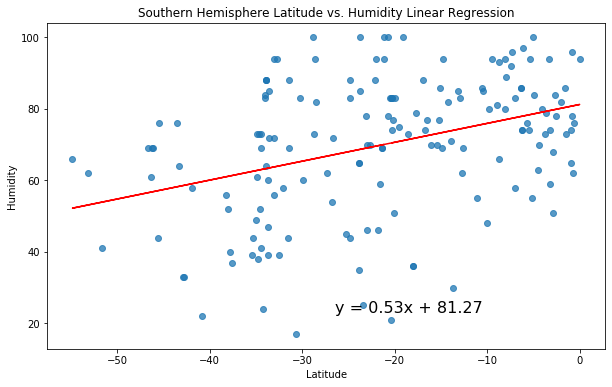

In [21]:
#Linear Regression Southern Hemisphere Max Temp vs Latitude
linRegressPlots(south_hem['Latitude'],south_hem['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.063


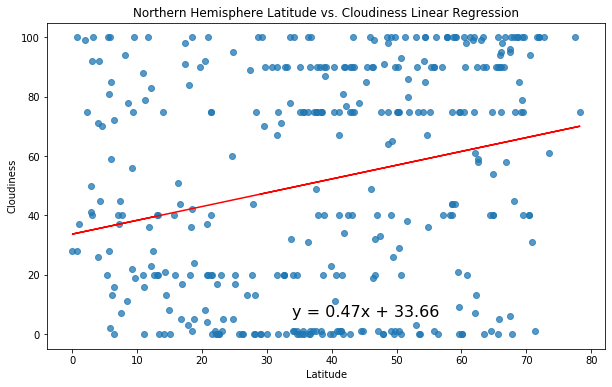

In [22]:
#Linear Regression Northern Hemisphere Cloudiness vs Latitude
linRegressPlots(north_hem['Latitude'],north_hem['Cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.103


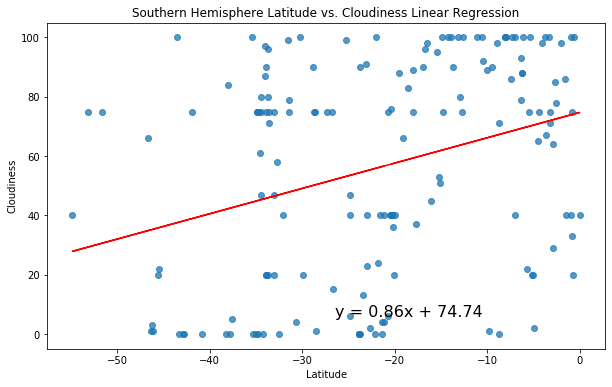

In [23]:
#Linear Regression Southern Hemisphere Cloudiness vs Latitude
linRegressPlots(south_hem['Latitude'],south_hem['Cloudiness'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004


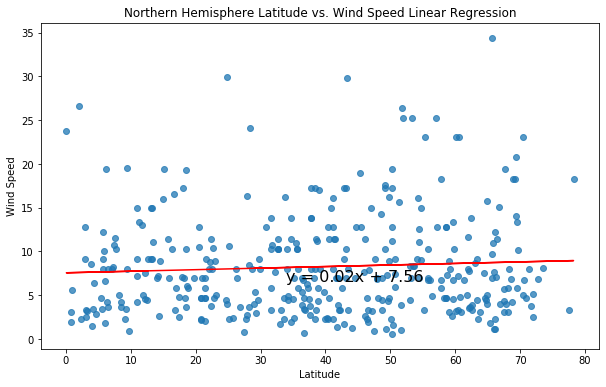

In [24]:
#Linear Regression Northern Hemisphere Wind Speed vs Latitude
linRegressPlots(north_hem['Latitude'],north_hem['Wind Speed'])